### Phase 5 is about text mining/sentiment analysis

1.	Use the twitter(X) data about Nifty50 
1.	Perform text pre-processing
1.	Obtain Word-Cloud
1.	Perform Sentiment Analysis
1.	Visualize sentiment scores

In [1]:
# Imports
import re # regular expressions
from string import punctuation # string punctuation
from string import digits # string digits
from nltk.corpus import stopwords # stopwords from nltk
from nltk.tokenize import word_tokenize # word tokenizer from nltk

from wordcloud import WordCloud # word cloud generator
import itertools # for advanced iteration functions
import matplotlib.pyplot as plt # plotting library

from nltk.sentiment.vader import SentimentIntensityAnalyzer # VADER sentiment analyzer from nltk
import pandas as pd # data manipulation library

In [2]:
# 1 - Instead of Twitter (X) Data, I used a fork of Werner's script to random generate Data
text = [line.rstrip() for line in open('twitter_dummy_data.txt')]
text[0:5]

['[2024-10-02 1007] #NIFTY50 gaps down. PMI. bulls trapped breakdown smart money exiting capitulation soon? #NSE $NIFTY 📊 http://bit.ly/hW61BC6B',
 '[2024-09-10 0834] Update: Nifty 50 ripping. buyers active volume surging no big flows yet constructive #Trading $NIFTY ⚖️ http://bit.ly/su12MhUtQ',
 '[2024-10-18 1234] Morning take: Nifty 50 ripping. shorts covering bears capitulating positive resistance break? #NSE #DalalStreet $NSE 🤑🎯',
 '[2023-04-11 0804] Morning: Nifty opens flat. digesting gains waiting on data #India #Trading $NIFTY50 🤔',
 '[2020-11-20 1511] Update: Nifty 50 pops at the open. bears capitulating new highs in sight momentum crazy #NSE $NIFTY 📰']

In [3]:
# 2 - Text Preprocessing

# Convert all text to lowercase and display the third line
corp = [item.lower() for item in text]
print(corp [2])

# remove mentions, tags and URLs and display the third line
corp = [re.sub(r'@\w+','', item) for item in corp]
corp = [re.sub(r'#\w+','', item) for item in corp]
corp = [re.sub(r'http\S+','', item) for item in corp]
print(corp[2])


# Remove punctuation and display the third line
remove_punc = str.maketrans('','', punctuation)
corp = [item.translate(remove_punc) for item in corp]
print(corp[2])

# Remove digits and display the third line
remove_digits = str.maketrans('', '', digits)
corp = [item.translate(remove_digits) for item in corp]
print(corp[2])

# remove stopwords and display the third line
stop_words = set(stopwords.words('english'))
corp = [' '.join([word for word in item.split() if word not in stop_words]) for item in corp]
print(corp[2])

# remove nifty related workd and display the third line
nifty_words = ['nifty', 'nifty50', 'dalalstreet', 'nse', 'bse', 'stock', 'market', 'stocks', 'markets', 'share', 'shares', 'india', 'indian', "'"]
corp = [' '.join([word for word in item.split() if word not in nifty_words]) for item in corp]
print(corp[2])

[2024-10-18 1234] morning take: nifty 50 ripping. shorts covering bears capitulating positive resistance break? #nse #dalalstreet $nse 🤑🎯
[2024-10-18 1234] morning take: nifty 50 ripping. shorts covering bears capitulating positive resistance break?   $nse 🤑🎯
20241018 1234 morning take nifty 50 ripping shorts covering bears capitulating positive resistance break   nse 🤑🎯
  morning take nifty  ripping shorts covering bears capitulating positive resistance break   nse 🤑🎯
morning take nifty ripping shorts covering bears capitulating positive resistance break nse 🤑🎯
morning take ripping shorts covering bears capitulating positive resistance break 🤑🎯


['morning', 'take', 'ripping', 'shorts', 'covering', 'bears', 'capitulating', 'positive', 'resistance', 'break', '🤑🎯']


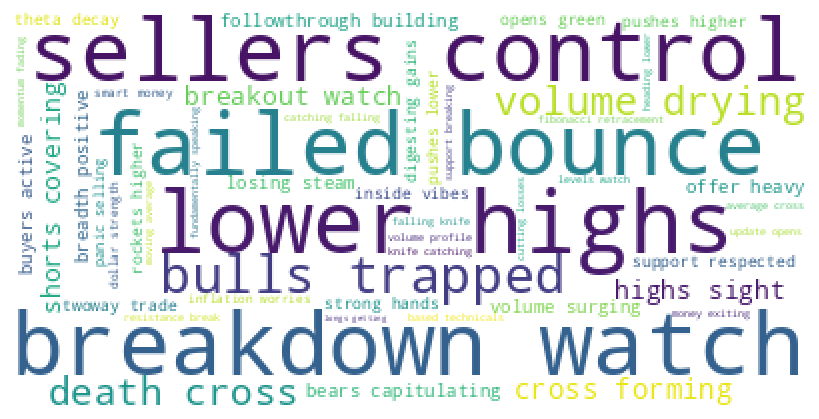

In [4]:
# Tokenize text and add the tokens to a list then display the third line tokenized
fs = []

for line in corp:
    words = word_tokenize(line)
    fs.append(words)

print(fs[2])

filtered_text = list(itertools.chain.from_iterable(fs))

# Generate and display Word Cloud
wordcloud = WordCloud(background_color="white",
                      min_word_length=5,
                      max_words=50).generate(' '.join(filtered_text))

plt.figure(figsize = (8, 8))
plt.imshow(wordcloud); plt.axis("off")
plt.tight_layout(pad = 0); plt.show()

In [ ]:
# 4 Perform Sentiment Analysis using VADER

sia = SentimentIntensityAnalyzer()

# Perform text processing but not as harsh as for word cloud
corp_sentiment = [line.lower() for line in text]

# remove mentions, date and URLs and display the third line
corp_sentiment = [re.sub(r'@\w+','', item) for item in corp_sentiment]
corp_sentiment = [re.sub(r'http\S+','', item) for item in corp_sentiment]
corp_sentiment = [re.sub(r'^\[\d{4}-\d{2}-\d{2}\s+\d{4}\]\s*', '', item) for item in corp_sentiment]
print(corp_sentiment[2])


sentiments = {'Positive':0, 'Negative':0, 'Neutral':0}
# Aanalyze sentiment for each line and update counts
for line in corp_sentiment:
    score = sia.polarity_scores(line)
    if score['compound'] >= 0.05:
        sentiments['Positive'] += 1
    elif score['compound'] <= -0.05:
        sentiments['Negative'] += 1
    else:
        sentiments['Neutral'] += 1

print(sentiments)

morning take: nifty 50 ripping. shorts covering bears capitulating positive resistance break? #nse #dalalstreet $nse 🤑🎯
{'Positive': 42998, 'Negative': 47454, 'Neutral': 11650}


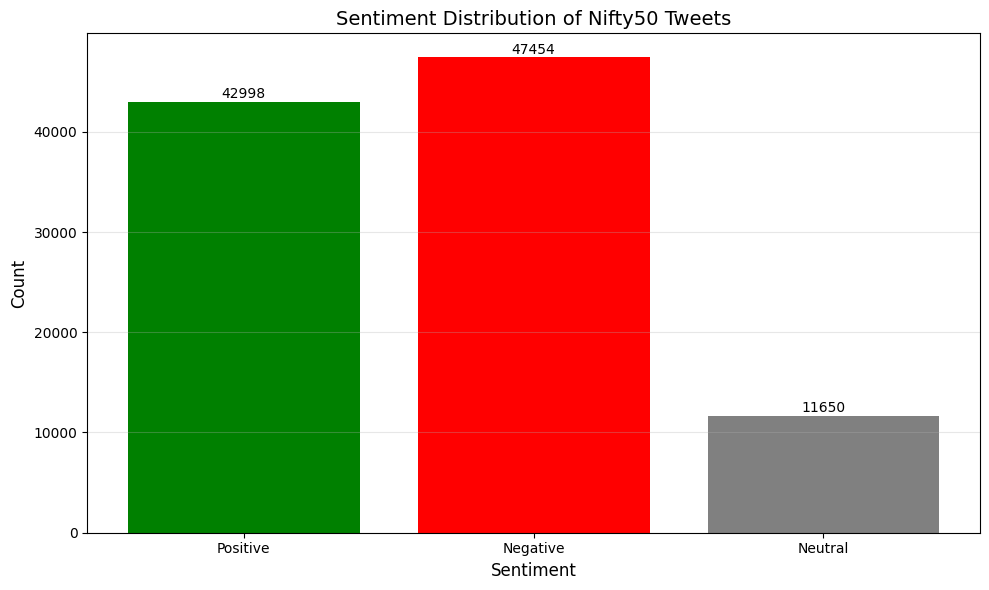


Sentiment Distribution:
Positive: 42,998 (42.1%)
Negative: 47,454 (46.5%)
Neutral: 11,650 (11.4%)


In [ ]:
# 5 - Visualize sentiment scores with histogram

# Create a DataFrame from the sentiments dictionary
sentiment_df = pd.DataFrame(list(sentiments.items()), columns=['Sentiment', 'Count'])

# Create histogram with the 3 sentiment categories
plt.figure(figsize=(10, 6))
plt.bar(sentiment_df['Sentiment'], sentiment_df['Count'], color=['green', 'red', 'gray'])
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment Distribution of Nifty50 Tweets', fontsize=14)
plt.grid(axis='y', alpha=0.3)

# Add count labels on top of bars
for i, v in enumerate(sentiment_df['Count']):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print percentages for extra information
total = sum(sentiments.values())
print("\nSentiment Distribution:")
for sentiment, count in sentiments.items():
    percentage = (count / total) * 100
    print(f"{sentiment}: {count:,} ({percentage:.1f}%)")